In [23]:
%matplotlib inline
%pylab inline
from numpy import *

Populating the interactive namespace from numpy and matplotlib


In [24]:
n = 30
h = 1/(n-1)
x = linspace(0,1,n)

In [25]:
# define matrix A
a = -ones((n-1))
b = 2*ones((n))
A = (1/h**2)*(diag(a,-1)+diag(b)+diag(a,1))

# modify A to impose boundary conditions
A[0,:] = 0
A[:,0] = 0
A[0,0] = 1

A[-1,:] = 0
A[:,-1] = 0
A[-1,-1] = 1

In [26]:
# forcing term

f = x*(1.-x)
f[0] = 0
f[-1] = 0
print(f)

[0.         0.0332937  0.06420927 0.09274673 0.11890606 0.14268728
 0.16409037 0.18311534 0.19976219 0.21403092 0.22592152 0.23543401
 0.24256837 0.24732461 0.24970273 0.24970273 0.24732461 0.24256837
 0.23543401 0.22592152 0.21403092 0.19976219 0.18311534 0.16409037
 0.14268728 0.11890606 0.09274673 0.06420927 0.0332937  0.        ]


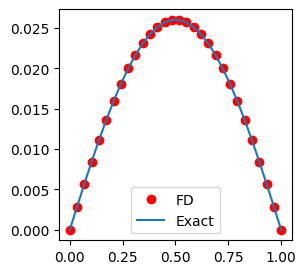

In [27]:
# solve the system using numpy

A1 = A.copy()
u = linalg.solve(A1, f)
u_ex = (x**4)/12. - (x**3)/6. + x/12.

# plot the FD and exact solution
figsize(3,3)
plot(x,u,'ro',label = 'FD')
plot(x,u_ex, label = 'Exact')
legend()

In [28]:
# implement the LU decomposition (Gauss method)

def LU(A):
    A = A.copy()
    N=len(A)
    for k in range(N-1):
        if (abs(A[k,k]) < 1e-15):
            raise RuntimeError("Null pivot")

        A[k+1:N,k] /= A[k,k]
        for j in range(k+1,N):
            A[k+1:N,j] -= A[k+1:N,k]*A[k,j]

    L=tril(A)
    for i in range(N):
        L[i,i]=1.0
    U = triu(A)
    return L, U


In [29]:
# forward substitution

def L_solve(L,rhs):
    x = zeros_like(rhs)
    N = len(L)

    x[0] = rhs[0]/L[0,0]
    for i in range(1,N):
        x[i] = (rhs[i] - dot(L[i, 0:i], x[0:i]))/L[i,i]

    return x

In [30]:
# backward substitution

def U_solve(U,rhs):
    x = zeros_like(rhs)
    N = len(U)

    x[-1] = rhs[-1]/U[-1,-1]
    for i in reversed(range(N-1)):
        x[i] = (rhs[i] - dot(U[i, i+1:N], x[i+1:N]))/U[i,i]

    return x

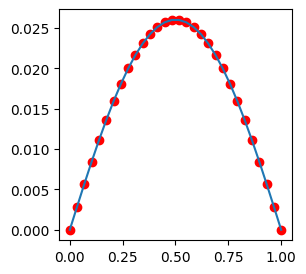

In [31]:
# LU factorization to solve the system

L, U = LU(A)
w = L_solve(L,f)
u = U_solve(U,w)

plot(x,u,'ro',label='computed')
plot(x,u_ex,label='exact')

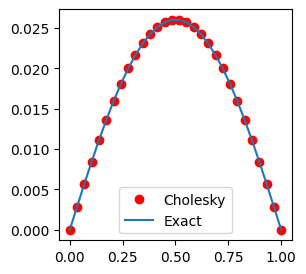

In [32]:
# cholesky decomposition

def cholesky(A):
    A = A.copy()
    N = len(A)
    for k in range(N-1):
        A[k,k] = sqrt(A[k,k])
        A[k+1:N,k] = A[k+1:N,k]/A[k,k]

        for j in range(k+1,N):
            A[j:N,j] = A[j:N,j] - A[j:N,k]*A[j,k]

    A[-1,-1] = sqrt(A[-1,-1])
    L=tril(A)
    return L, L.transpose()

HT, H = cholesky(A)
y = L_solve(HT,f)
u = U_solve(H,y)


plot(x,u,'ro', label='Cholesky')
plot(x,u_ex, label='Exact')
legend()

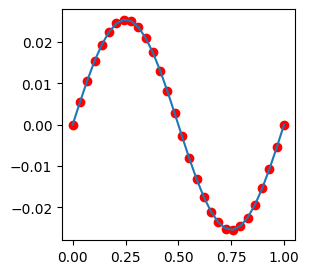

In [33]:
# try to compute the solution u for difference forcing term and compare with the
# exact solution without recomputing the LU decompostion

f = sin(2*pi*x)

w = L_solve(L,f)
u = U_solve(U,w)

u_ex = linalg.solve(A1, f)

plot(x,u,'ro',label='computed')
plot(x,u_ex,label='exact')